[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/StadynR/HAR-imu-photogrammetry/blob/main/Notebooks/Dataset%202/Photogrammetry.ipynb)

# Dataset 2 - Photogrammetry

This notebook contains code and explanations for the training and testing of 8 different AI architectures for the task of Human Action Recognition on three different arm exercises using time series data obtained from motion sensors (accelerometers, gyroscopes).

## Access to Google Drive and load dataset

You need to create a shortcut in your Drive home to this folder: https://drive.google.com/drive/folders/1k2sAkmRyyctE1uOc19mrixyt2N47-7pt?usp=share_link

In [1]:
#Drive mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Read document
import pandas as pd
df=pd.read_excel('/content/drive/MyDrive/Datasets/Dataset 2/Exercises.xlsx', sheet_name='FOTOGRAMETRIA')
df

,EJERCICIO,Tiempo,acc_m1_x,acc_m1_y,acc_m1_z,acc_m2_x,acc_m2_y,acc_m2_z,acc_m3_x,acc_m3_y,...,pos_m1_z,pos_m2_x,pos_m2_y,pos_m2_z,pos_m3_x,pos_m3_y,pos_m3_z,pos_m4_x,pos_m4_y,pos_m4_z
0,1,0.000,-2.630588,-5.181026,-3.291730,-22.287810,10.404390,-15.450810,13.546460,24.804080,...,1.269329,0.602129,1.269825,1.003215,0.616105,1.224391,0.800753,0.529432,1.182537,1.455978
1,1,0.005,-2.266943,-3.080866,-3.144995,-10.305070,5.592131,-10.894250,6.436962,13.463620,...,1.269278,0.602357,1.269472,1.003143,0.616324,1.223768,0.800567,0.529394,1.182563,1.455925
2,1,0.010,0.429659,4.443026,-1.183701,19.128730,-6.788143,4.205804,-8.773339,-22.853720,...,1.269151,0.602409,1.269226,1.002836,0.616658,1.223393,0.800583,0.529280,1.182746,1.455776
3,1,0.015,3.243615,-0.029597,2.923970,-24.291290,7.054437,2.986358,2.995758,-2.834475,...,1.269003,0.602696,1.268901,1.002574,0.616908,1.222619,0.800555,0.529237,1.182773,1.455721
4,1,0.020,-2.057330,-5.653708,-0.505290,20.144560,-11.824070,12.081090,-60.459210,-6.435761,...,1.268904,0.602672,1.268633,1.002450,0.616903,1.221676,0.800687,0.529280,1.182947,1.455635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270010,3,89.980,2.314281,-25.122900,-12.548810,21.507410,28.557130,41.155640,12.245690,15.768440,...,1.316638,0.681221,0.643349,1.096236,0.774200,0.512262,0.955330,0.417546,0.617479,1.460203
270011,3,89.985,-3.841147,29.497670,17.240680,-1.357648,-11.553720,-31.141200,-16.370570,-11.964180,...,1.316507,0.681332,0.642591,1.096744,0.773425,0.508921,0.957260,0.417511,0.617651,1.460190
270012,3,89.990,2.536258,-22.683570,-12.268850,-17.767210,-25.438620,25.249110,9.626001,-0.980865,...,1.316611,0.681434,0.641601,1.096935,0.772449,0.505420,0.959640,0.417546,0.617759,1.460113
270013,3,89.995,-7.676702,14.673840,2.989491,12.725990,14.473900,-9.909791,-14.665940,-4.656969,...,1.316559,0.681216,0.640117,1.097434,0.771541,0.501833,0.961918,0.417724,0.617977,1.459977


## Dataset Information

In [3]:
# Data info
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270015 entries, 0 to 270014
Data columns (total 26 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   EJERCICIO  270015 non-null  int64  
 1   Tiempo     270015 non-null  float64
 2   acc_m1_x   270015 non-null  float64
 3   acc_m1_y   270015 non-null  float64
 4   acc_m1_z   270015 non-null  float64
 5   acc_m2_x   270015 non-null  float64
 6   acc_m2_y   270015 non-null  float64
 7   acc_m2_z   270015 non-null  float64
 8   acc_m3_x   270015 non-null  float64
 9   acc_m3_y   270015 non-null  float64
 10  acc_m3_z   270015 non-null  float64
 11  acc_m4_x   270015 non-null  float64
 12  acc_m4_y   270015 non-null  float64
 13  acc_m4_z   270015 non-null  float64
 14  pos_m1_x   270015 non-null  float64
 15  pos_m1_y   270015 non-null  float64
 16  pos_m1_z   270015 non-null  float64
 17  pos_m2_x   270015 non-null  float64
 18  pos_m2_y   270015 non-null  float64
 19  pos_m2_z   270015 non-n

(270015, 26)

### Dataset information plot

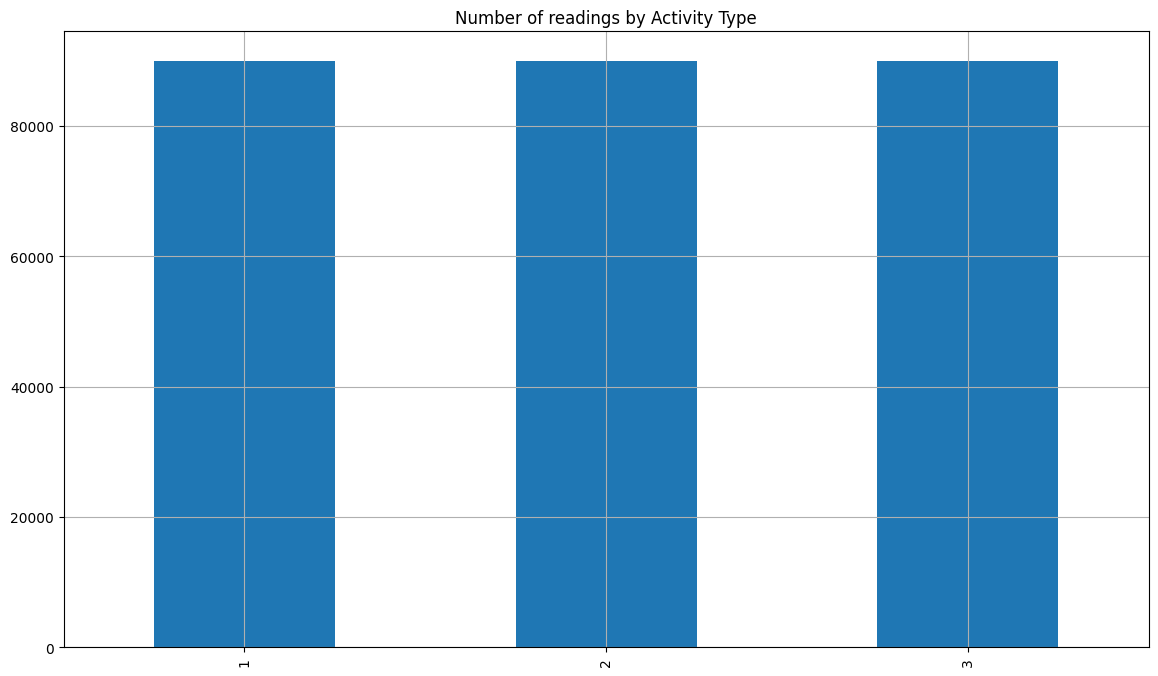

In [4]:
#Readings per activity
countOfActivities = df['EJERCICIO'].value_counts()
countOfActivities.plot(kind='bar',title='Number of readings by Activity Type',figsize=(14,8),grid=True);

In [13]:
import matplotlib.pyplot as plt

labs = ['FLx','FLy','FLz','FMx','FMy','FMz','FUx','FUy','FUz','ALx','ALy','ALz']

def plot_activity(activity,df,start=0,stop=200):
  # extractRowsOfActivity = (df['EJERCICIO'] == int(activity))  # Output will be true/false.
  data = df[:]
  data = data[['pos_m1_x', 'pos_m1_y', 'pos_m1_z', 'pos_m2_x', 'pos_m2_y', 'pos_m2_z', 'pos_m3_x', 'pos_m3_y', 'pos_m3_z', 'pos_m4_x', 'pos_m4_y', 'pos_m4_z']]
  data.columns = labs
  # data = data[['acc_m1_x', 'acc_m1_y', 'acc_m1_z', 'acc_m2_x', 'acc_m2_y', 'acc_m2_z', 'acc_m3_x', 'acc_m3_y', 'acc_m3_z', 'acc_m4_x', 'acc_m4_y', 'acc_m4_z', 'pos_m1_x', 'pos_m1_y', 'pos_m1_z', 'pos_m2_x', 'pos_m2_y', 'pos_m2_z', 'pos_m3_x', 'pos_m3_y', 'pos_m3_z', 'pos_m4_x', 'pos_m4_y', 'pos_m4_z']] # data has only the accelerometer columns.
  data = data[start:stop]

  ax = data.plot(subplots=True,figsize=(16,12)) # Plot accelerometer for the activity.
  ax = ax.flat
  fig = ax[0].get_figure()
  for idx, x in enumerate(ax):
    x.legend([labs[idx]], loc="upper left")
    x.set_yticks([])
  plt.show()

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >], dtype=object)

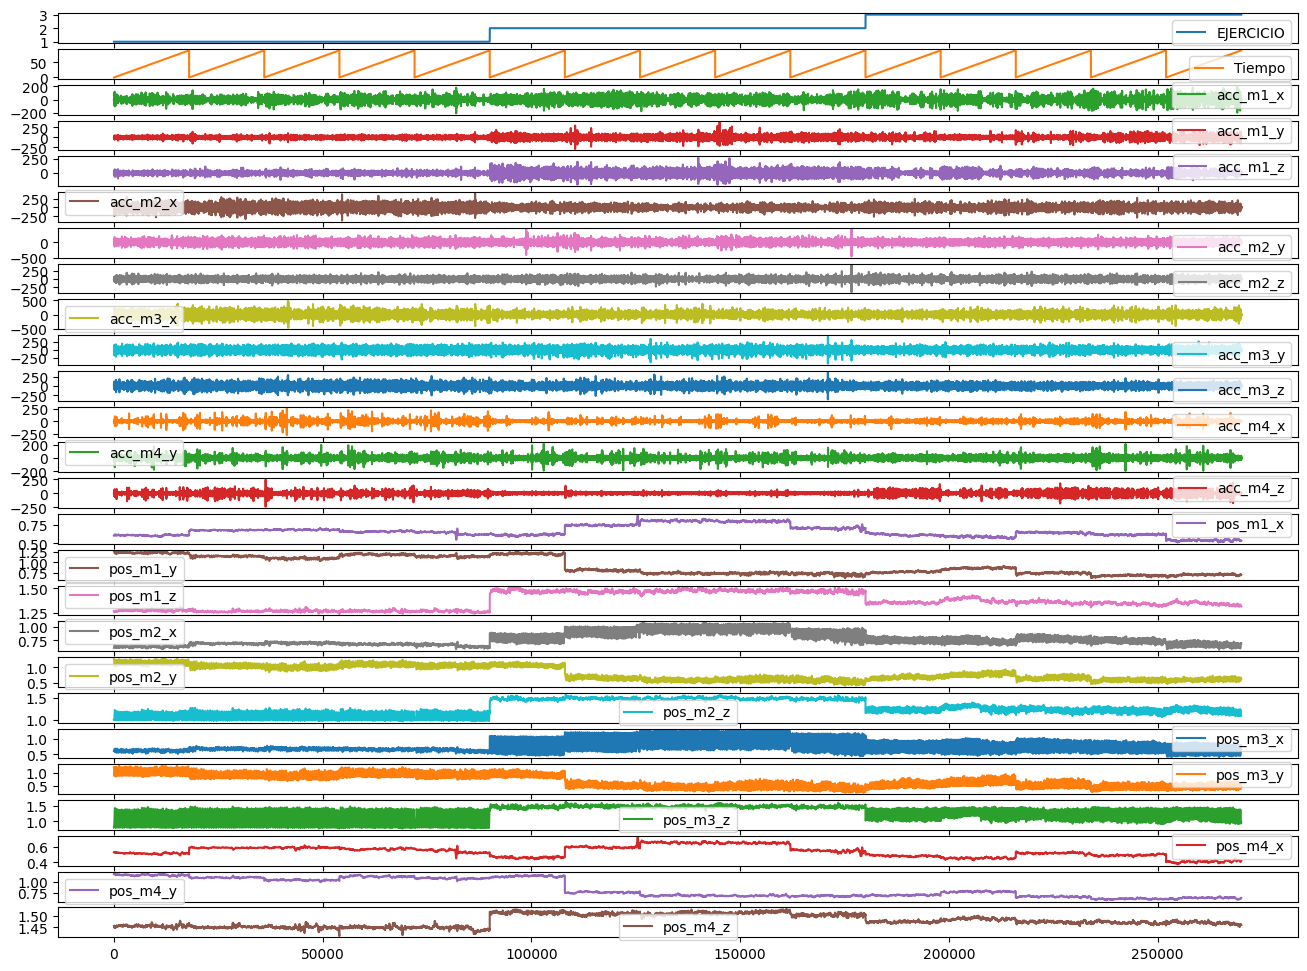

In [6]:
df.plot(subplots=True,figsize=(16,12))

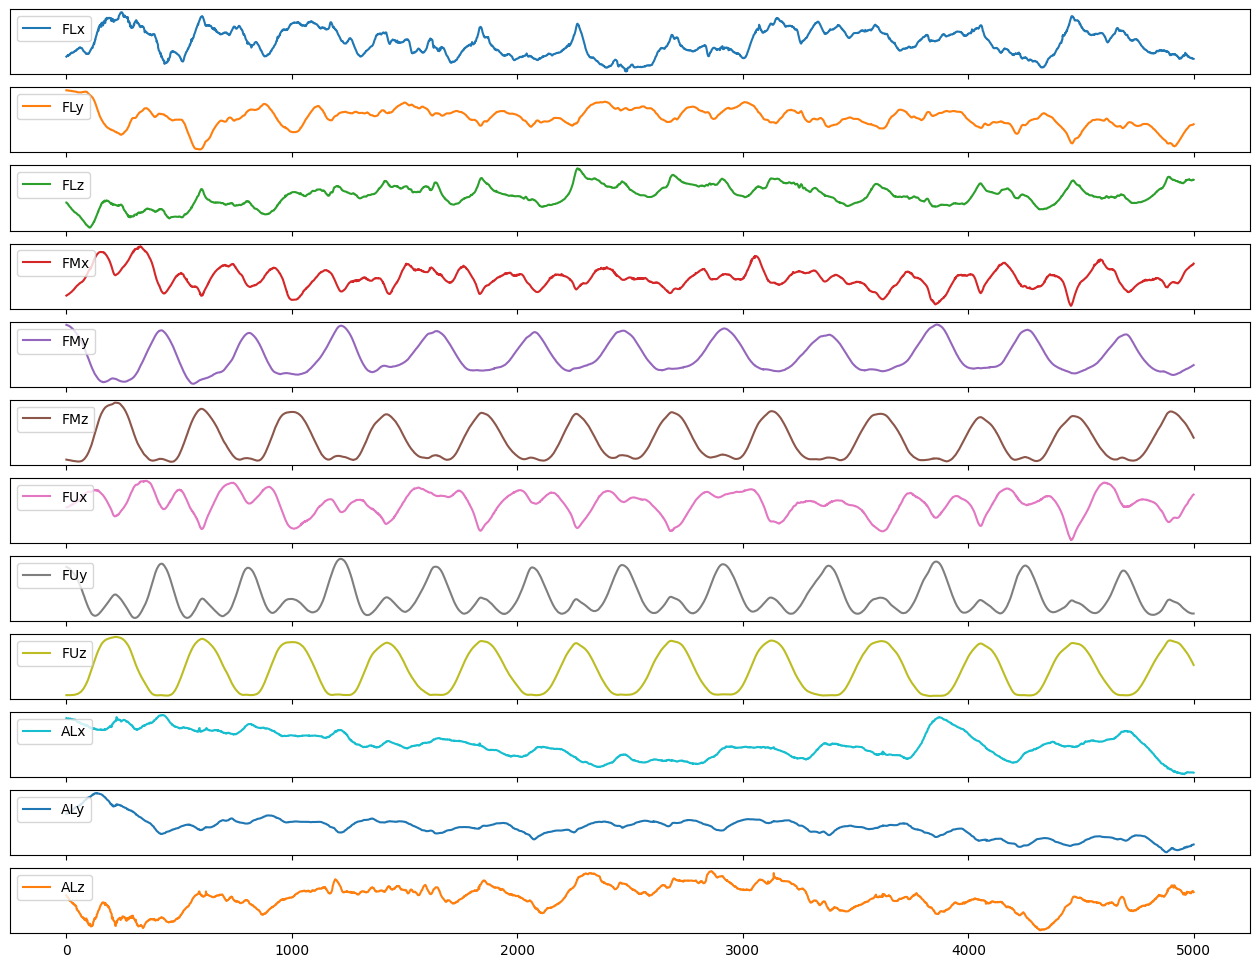

In [14]:
plot_activity('1',df, 0, 5000)

## Preprocessing

- Normalizing the measurements to be between 0 and 1.
- Transforming the measurements to be in a 3-D array of [samples, timesteps,features].
- One hot encoding the activity names.
- Breaking the 3-D array into a training and test dataset.

### Data Normalization

In [15]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
df['acc_m1_x_mms'] = mms.fit_transform(df[['acc_m1_x']])
df['acc_m1_y_mms'] = mms.fit_transform(df[['acc_m1_y']])
df['acc_m1_z_mms'] = mms.fit_transform(df[['acc_m1_z']])

df['acc_m2_x_mms'] = mms.fit_transform(df[['acc_m2_x']])
df['acc_m2_y_mms'] = mms.fit_transform(df[['acc_m2_y']])
df['acc_m2_z_mms'] = mms.fit_transform(df[['acc_m2_z']])

df['acc_m3_x_mms'] = mms.fit_transform(df[['acc_m3_x']])
df['acc_m3_y_mms'] = mms.fit_transform(df[['acc_m3_y']])
df['acc_m3_z_mms'] = mms.fit_transform(df[['acc_m3_z']])

df['acc_m4_x_mms'] = mms.fit_transform(df[['acc_m4_x']])
df['acc_m4_y_mms'] = mms.fit_transform(df[['acc_m4_y']])
df['acc_m4_z_mms'] = mms.fit_transform(df[['acc_m4_z']])

df['pos_m1_x_mms'] = mms.fit_transform(df[['pos_m1_x']])
df['pos_m1_y_mms'] = mms.fit_transform(df[['pos_m1_y']])
df['pos_m1_z_mms'] = mms.fit_transform(df[['pos_m1_z']])

df['pos_m2_x_mms'] = mms.fit_transform(df[['pos_m2_x']])
df['pos_m2_y_mms'] = mms.fit_transform(df[['pos_m2_y']])
df['pos_m2_z_mms'] = mms.fit_transform(df[['pos_m2_z']])

df['pos_m3_x_mms'] = mms.fit_transform(df[['pos_m3_x']])
df['pos_m3_y_mms'] = mms.fit_transform(df[['pos_m3_y']])
df['pos_m3_z_mms'] = mms.fit_transform(df[['pos_m3_z']])

df['pos_m4_x_mms'] = mms.fit_transform(df[['pos_m4_x']])
df['pos_m4_y_mms'] = mms.fit_transform(df[['pos_m4_y']])
df['pos_m4_z_mms'] = mms.fit_transform(df[['pos_m4_z']])
df.describe().round(2)

,EJERCICIO,Tiempo,acc_m1_x,acc_m1_y,acc_m1_z,acc_m2_x,acc_m2_y,acc_m2_z,acc_m3_x,acc_m3_y,...,pos_m1_z_mms,pos_m2_x_mms,pos_m2_y_mms,pos_m2_z_mms,pos_m3_x_mms,pos_m3_y_mms,pos_m3_z_mms,pos_m4_x_mms,pos_m4_y_mms,pos_m4_z_mms
count,270015.00,270015.00,270015.00,270015.00,270015.00,270015.00,270015.00,270015.00,270015.00,270015.00,...,270015.00,270015.00,270015.00,270015.00,270015.00,270015.00,270015.00,270015.00,270015.00,270015.00
mean,2.00,45.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,...,0.46,0.40,0.44,0.48,0.41,0.42,0.56,0.47,0.44,0.56
std,0.82,25.98,15.66,18.09,16.06,29.37,32.25,24.66,36.86,35.98,...,0.30,0.24,0.26,0.29,0.23,0.23,0.27,0.20,0.34,0.22
min,1.00,0.00,-205.57,-288.07,-206.88,-371.28,-458.98,-388.41,-472.85,-426.77,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,22.50,-6.00,-8.70,-5.66,-12.69,-17.57,-12.19,-15.55,-20.15,...,0.13,0.22,0.21,0.27,0.25,0.21,0.33,0.32,0.15,0.35
50%,2.00,45.00,0.01,0.02,0.01,0.04,-0.06,-0.01,-0.07,-0.04,...,0.42,0.32,0.34,0.41,0.33,0.36,0.66,0.46,0.28,0.51
75%,3.00,67.50,6.03,8.76,5.67,12.76,17.58,12.10,15.48,20.28,...,0.80,0.55,0.69,0.81,0.56,0.62,0.78,0.62,0.83,0.78
max,3.00,90.00,202.82,378.91,268.39,395.79,420.85,415.75,487.05,418.87,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


### Transformation of dimensions as a 3D array

Considering the size of the dataset, a number of samples of 200 was considered enough to have good training and test sets

In [16]:
import numpy as np
from scipy import stats
nSamplesInEach = 200
nFeatures = 24
samples = []
labels = []
for i in range(0,len(df)-nSamplesInEach,nSamplesInEach):
  xam1 = df['acc_m1_x_mms'].values[i:i+nSamplesInEach]
  yam1 = df['acc_m1_y_mms'].values[i:i+nSamplesInEach]
  zam1 = df['acc_m1_z_mms'].values[i:i+nSamplesInEach]

  xam2 = df['acc_m2_x_mms'].values[i:i+nSamplesInEach]
  yam2 = df['acc_m2_y_mms'].values[i:i+nSamplesInEach]
  zam2 = df['acc_m2_z_mms'].values[i:i+nSamplesInEach]

  xam3 = df['acc_m3_x_mms'].values[i:i+nSamplesInEach]
  yam3 = df['acc_m3_y_mms'].values[i:i+nSamplesInEach]
  zam3 = df['acc_m3_z_mms'].values[i:i+nSamplesInEach]

  xam4 = df['acc_m4_x_mms'].values[i:i+nSamplesInEach]
  yam4 = df['acc_m4_y_mms'].values[i:i+nSamplesInEach]
  zam4 = df['acc_m4_z_mms'].values[i:i+nSamplesInEach]

  xpm1 = df['pos_m1_x_mms'].values[i:i+nSamplesInEach]
  ypm1 = df['pos_m1_y_mms'].values[i:i+nSamplesInEach]
  zpm1 = df['pos_m1_z_mms'].values[i:i+nSamplesInEach]

  xpm2 = df['pos_m2_x_mms'].values[i:i+nSamplesInEach]
  ypm2 = df['pos_m2_y_mms'].values[i:i+nSamplesInEach]
  zpm2 = df['pos_m2_z_mms'].values[i:i+nSamplesInEach]

  xpm3 = df['pos_m3_x_mms'].values[i:i+nSamplesInEach]
  ypm3 = df['pos_m3_y_mms'].values[i:i+nSamplesInEach]
  zpm3 = df['pos_m3_z_mms'].values[i:i+nSamplesInEach]

  xpm4 = df['pos_m4_x_mms'].values[i:i+nSamplesInEach]
  ypm4 = df['pos_m4_y_mms'].values[i:i+nSamplesInEach]
  zpm4 = df['pos_m4_z_mms'].values[i:i+nSamplesInEach]

  label = stats.mode(df['EJERCICIO'][i:i+nSamplesInEach])
  label = label[0][0]

  samples.append([xam1, yam1, zam1, xam2, yam2, zam2, xam3, yam3, zam3, xam4, yam4, zam4, xpm1, ypm1, zpm1, xpm2, ypm2, zpm2, xpm3, ypm3, zpm3, xpm4, ypm4, zpm4])
  labels.append(label)

# Dimensions of resulting tensor
np.array(samples).shape

<ipython-input-16-741518b7e5e5>:40: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label = stats.mode(df['EJERCICIO'][i:i+nSamplesInEach])


(1350, 24, 200)

### Reshape

This is necessary so that the dimensions of the tensor are in the correct order, that is, to change the shape from (samples, features, timesteps) to (samples, timesteps, features).

In [17]:
reshaped_s = np.array(samples).reshape(-1,nSamplesInEach,nFeatures)
np.array(reshaped_s).shape

(1350, 200, 24)

In [18]:
# Length of dataset after preprocessing
print(len(reshaped_s))

1350


### Label Encoding

To make training easier, the labels are encoded to binary values, which are easier to process and map in a neural network.

In [19]:
#Labels
text_labels = np.array(labels[:])
orig_labels = list(dict.fromkeys(labels)) # Get unique labels
print(orig_labels)
print(text_labels)#Labels
orig_labels = list(dict.fromkeys(labels)) # Get unique labels
print(orig_labels)
labels[:10]

[1, 2, 3]
[1 1 1 ... 3 3 3]
[1, 2, 3]


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [20]:
labels = np.array(pd.get_dummies(labels))
labels[:10]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]], dtype=uint8)

In [21]:
# Identify unique encoded labels
_, idx = np.unique(labels, axis=0, return_index=True)
encoded_labels = labels[np.sort(idx)]
print(encoded_labels)

[[1 0 0]
 [0 1 0]
 [0 0 1]]


In [22]:
# Shape of the label list
labels.shape

(1350, 3)

## Creation of training and testing splits

For splitting, we used k-fold cross-validation. It involves dividing the dataset into *k* subsets. One of the subsets is used as the testing set, while the remaining *k-1* subsets are used as the training set. This process is repeated *k* times, with each subset being used as the testing set once. The performance of the model is then averaged over the *k* iterations.





In [23]:
# Create a kfold object of 5 splits

from sklearn.model_selection import KFold

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

## Architectures

### Architecture 1: LSTM(128) + Dropout + Fully Connected + Fully Connected

Source: https://www.analyticsvidhya.com/blog/2021/07/implementing-lstm-for-human-activity-recognition-using-smartphone-accelerometer-data/

In [24]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Conv1D, MaxPooling1D, Flatten, Reshape

This simple architecture uses a LSTM layer of 128 neurons to process the time series data, then a dropout layer to prevent overfitting, and two fully connected layers to map the information from previous layers to the 4 outputs.

**Loss function:** Categorical Cross Entropy

**Optimizer:** Adam

In [25]:
def create_model(n_outputs):
  model = Sequential()
  # RNN layer
  model.add(LSTM(units = 128, input_shape = (X_train.shape[1], X_train.shape[2])))
  # Dropout layer
  model.add(Dropout(0.5))
  # Dense layer with ReLu
  model.add(Dense(units = 64, activation='relu'))
  # Softmax layer
  model.add(Dense(n_outputs, activation = 'softmax'))

  print(model.summary())
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  return model

#### Train the model

Train the model for 50 epochs in mini-batches of 32 samples (because the dataset is small). This will be done for all the splits made by the kfold. This is 50 iterations over all samples in the `x_train` and `y_train` tensors.

In [26]:
from sklearn.metrics import accuracy_score, log_loss, precision_score, recall_score, f1_score
import tensorflow as tf

# Initialization of train and test

X = reshaped_s
Y = labels

In [27]:
train_accuracies = []
train_losses = []
test_accuracies = []
test_losses = []
precisions = []
recalls = []
f1_scores = []

for id, (train_index, test_index) in enumerate(kfold.split(X)):

    print(f"------------------------------------------ SPLIT {id + 1} -------------------------------------------")

    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]

    print(f"X train length: {len(X_train)}    X test length: {len(X_test)}")
    print(f"y train length: {len(Y_train)}    y test length: {len(Y_test)}")

    # Get the input shape -> (samples, time steps, features)
    n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], Y_train.shape[1]
    print('n_timesteps: {}, n_features: {}, n_outputs: {}'.format(n_timesteps,n_features, n_outputs))

    model = create_model(n_outputs)

    history = model.fit(X_train, Y_train, epochs = 100, batch_size = 64, verbose = 0)
    history_dict = history.history

    # Get the historical values for accuracies and losses

    acc = history_dict['accuracy']
    loss = history_dict['loss']

    # Save the last values for accuracies and losses for comparison

    train_acc = acc[-1]
    train_loss = loss[-1]

    train_accuracies.append(train_acc)
    train_losses.append(train_loss)

    Y_pred = model.predict(X_test)
    Y_pred = tf.argmax(Y_pred, axis=1)
    Y_test_flat = []

    for encoding in Y_test:
      index = int(np.where(encoding == 1)[0])
      Y_test_flat.append(index)

    Y_test = tf.constant(Y_test_flat)

    test_acc = accuracy_score(Y_test, Y_pred)
    test_loss = log_loss(Y_test, model.predict(X_test))
    precision = precision_score(Y_test, Y_pred, average = 'weighted')
    recall = recall_score(Y_test, Y_pred, average = 'weighted')
    f1score = f1_score(Y_test, Y_pred, average = 'weighted')

    test_accuracies.append(test_acc)
    test_losses.append(test_loss)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1score)

    print("Train Accuracy: ", train_acc)
    print("Train Loss: ", train_loss)
    print("Test Accuracy: ", test_acc)
    print("Test Loss: ", test_loss)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1 score: ", f1score)
    print(f"-----------------------------------------------------------------------------------------------\n")

arch1_train_acc = np.mean(train_accuracies)
arch1_train_loss = np.mean(train_losses)
arch1_test_acc = np.mean(test_accuracies)
arch1_test_loss = np.mean(test_losses)
arch1_precision = np.mean(precisions)
arch1_recall = np.mean(recalls)
arch1_f1_score = np.mean(f1_scores)

arch1_train_std = np.std(train_accuracies)
arch1_test_std = np.std(test_accuracies)
arch1_precision_std = np.std(precisions)
arch1_recall_std = np.std(recalls)
arch1_f1_score_std = np.std(f1_scores)

print("Mean Train Accuracy: %.2f%% (+/- %.2f%%)" % (arch1_train_acc * 100, np.std(train_accuracies) * 100))
print("Mean Train Loss: %.2f%%" % (arch1_train_loss * 100))
print("Mean Test Accuracy: %.2f%% (+/- %.2f%%)" % (arch1_test_acc * 100, np.std(test_accuracies) * 100))
print("Mean Test Loss: %.2f%%" % (arch1_test_loss * 100))
print("Mean Precision: %.2f%% (+/- %.2f%%)" % (arch1_precision * 100, np.std(precisions) * 100))
print("Mean Recall: %.2f%% (+/- %.2f%%)" % (arch1_recall * 100, np.std(recalls) * 100))
print("Mean F1 score: %.2f%% (+/- %.2f%%)" % (arch1_f1_score * 100, np.std(f1_scores) * 100))

------------------------------------------ SPLIT 1 -------------------------------------------
X train length: 1080    X test length: 270
y train length: 1080    y test length: 270
n_timesteps: 200, n_features: 24, n_outputs: 3
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               78336     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 86,787
Trainable params: 86,787
Non-trainable params: 0
______________________

#### Create a graph of accuracy and loss over time

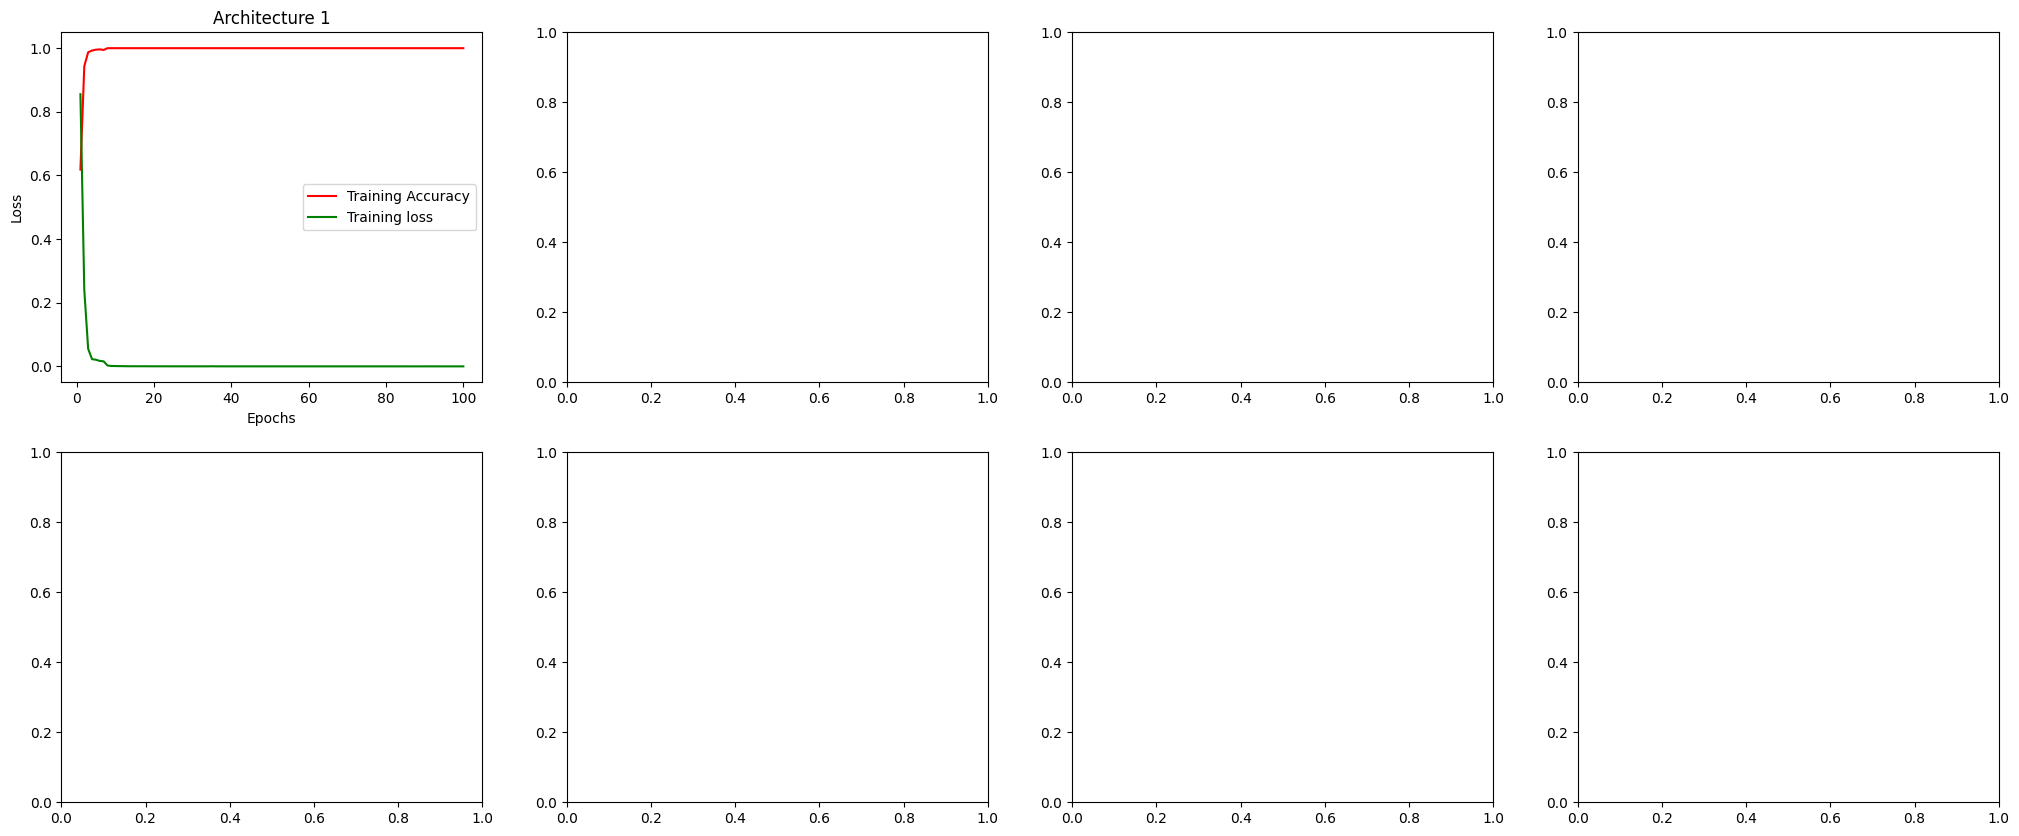

In [28]:
import matplotlib.pyplot as plt

epochs = range(1, len(acc) + 1)

# Create 7 subplots in a grid with 3 rows and 3 columns
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(25, 10))

axes[0, 0].plot(epochs, acc, 'r', label='Training Accuracy')
axes[0, 0].plot(epochs, loss, 'g', label='Training loss')
axes[0, 0].set_title("Architecture 1")
axes[0, 0].set_xlabel('Epochs')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()

### Architecture 2: LSTM(128) + Dropout + LSTM(64) + Dropout + Fully Connected

Source: https://github.com/srvds/Human-Activity-Recognition

This architecture uses a LSTM layer of 128 neurons to process the time series data, then a dropout layer to prevent overfitting, another LSTM and another dropout layer for improving the previous architecture, and a fully connected layer to map the information from previous layers to the 4 outputs.

In [29]:
def create_model(n_outputs):
  # Initiliazing the sequential model
  model = keras.Sequential()
  # Add LSTM layer
  model.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
  # Adding a dropout layer
  model.add(Dropout(0.5))
  # Add another LSTM layer
  model.add(LSTM(64))
  # Adding a dropout layer
  model.add(Dropout(0.5))
  # Adding a dense output layer with sigmoid activation
  model.add(Dense(n_outputs, activation='sigmoid'))

  print(model.summary())

  #lost function and optimizer
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

#### Evaluate the model

In [30]:
train_accuracies = []
train_losses = []
test_accuracies = []
test_losses = []
precisions = []
recalls = []
f1_scores = []

for id, (train_index, test_index) in enumerate(kfold.split(X)):

    print(f"------------------------------------------ SPLIT {id + 1} -------------------------------------------")

    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]

    print(f"X train length: {len(X_train)}    X test length: {len(X_test)}")
    print(f"y train length: {len(Y_train)}    y test length: {len(Y_test)}")

    # Get the input shape -> (samples, time steps, features)
    n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], Y_train.shape[1]
    print('n_timesteps: {}, n_features: {}, n_outputs: {}'.format(n_timesteps,n_features, n_outputs))

    model = create_model(n_outputs)

    history = model.fit(X_train, Y_train, epochs = 100, batch_size = 64, verbose = 0)
    history_dict = history.history

    # Get the historical values for accuracies and losses

    acc = history_dict['accuracy']
    loss = history_dict['loss']

    # Save the last values for accuracies and losses for comparison

    train_acc = acc[-1]
    train_loss = loss[-1]

    train_accuracies.append(train_acc)
    train_losses.append(train_loss)

    Y_pred = model.predict(X_test)
    Y_pred = tf.argmax(Y_pred, axis=1)
    Y_test_flat = []

    for encoding in Y_test:
      index = int(np.where(encoding == 1)[0])
      Y_test_flat.append(index)

    Y_test = tf.constant(Y_test_flat)

    test_acc = accuracy_score(Y_test, Y_pred)
    test_loss = log_loss(Y_test, model.predict(X_test))
    precision = precision_score(Y_test, Y_pred, average = 'weighted')
    recall = recall_score(Y_test, Y_pred, average = 'weighted')
    f1score = f1_score(Y_test, Y_pred, average = 'weighted')

    test_accuracies.append(test_acc)
    test_losses.append(test_loss)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1score)

    print("Train Accuracy: ", train_acc)
    print("Train Loss: ", train_loss)
    print("Test Accuracy: ", test_acc)
    print("Test Loss: ", test_loss)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1 score: ", f1score)
    print(f"-----------------------------------------------------------------------------------------------\n")

arch2_train_acc = np.mean(train_accuracies)
arch2_train_loss = np.mean(train_losses)
arch2_test_acc = np.mean(test_accuracies)
arch2_test_loss = np.mean(test_losses)
arch2_precision = np.mean(precisions)
arch2_recall = np.mean(recalls)
arch2_f1_score = np.mean(f1_scores)

arch2_train_std = np.std(train_accuracies)
arch2_test_std = np.std(test_accuracies)
arch2_precision_std = np.std(precisions)
arch2_recall_std = np.std(recalls)
arch2_f1_score_std = np.std(f1_scores)

print("Mean Train Accuracy: %.2f%% (+/- %.2f%%)" % (arch2_train_acc * 100, np.std(train_accuracies) * 100))
print("Mean Train Loss: %.2f%%" % (arch2_train_loss * 100))
print("Mean Test Accuracy: %.2f%% (+/- %.2f%%)" % (arch2_test_acc * 100, np.std(test_accuracies) * 100))
print("Mean Test Loss: %.2f%%" % (arch2_test_loss * 100))
print("Mean Precision: %.2f%% (+/- %.2f%%)" % (arch2_precision * 100, np.std(precisions) * 100))
print("Mean Recall: %.2f%% (+/- %.2f%%)" % (arch2_recall * 100, np.std(recalls) * 100))
print("Mean F1 score: %.2f%% (+/- %.2f%%)" % (arch2_f1_score * 100, np.std(f1_scores) * 100))

------------------------------------------ SPLIT 1 -------------------------------------------
X train length: 1080    X test length: 270
y train length: 1080    y test length: 270
n_timesteps: 200, n_features: 24, n_outputs: 3
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 200, 128)          78336     
                                                                 
 dropout_5 (Dropout)         (None, 200, 128)          0         
                                                                 
 lstm_6 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 3)                 195       
                        

#### Create a graph of accuracy and loss over time

In [31]:
epochs = range(1, len(acc) + 1)

axes[0, 1].plot(epochs, acc , 'r', label='Training Accuracy')
axes[0, 1].plot(epochs, loss, 'g', label='Training loss')
axes[0, 1].set_title("Architecture 2")
axes[0, 1].set_xlabel('Epochs')
axes[0, 1].set_ylabel('Loss')
axes[0, 1].legend()

### Architecture 3: Conv1D(64) + Conv1D(64) + Dropout + Max Pooling + Flatten + Fully Connected + Fully Connected

Source: https://github.com/CDAC-lab/ETFA-Workshop/blob/main/CNN%20and%20LSTM%20for%20Human%20Activity%20Recognition.ipynb

This architecture focuses on convolutional neural networks. The first two layers are 1D convolutions of 64 filters, then a dropout layer to prevent overfitting, a max pooling layer to reduce dimensionality, a flatten layer to use dense layers, and two fully connected layers to map the information from previous layers to the 4 outputs.

In [32]:
def create_model(n_outputs):

  # Define the model
  model = keras.Sequential()

  # Add a 1D Convolutional layer with 32 filters and a kernel size of 3
  model.add(Conv1D(filters=64, kernel_size=4, activation='relu', input_shape=(n_timesteps,n_features)))

  # Add a 1D Convolutional layer with 64 filters and a kernel size of 3
  model.add(Conv1D(filters=64, kernel_size=4, activation='relu', input_shape=(n_timesteps,n_features)))

  # Add a dropout layer with a rate of 0.5
  model.add(Dropout(rate=0.5))

  # Add a Max Pooling layer with a pool size of 2
  model.add(MaxPooling1D(pool_size=2))

  # Add a Flatten layer
  model.add(Flatten())

  # Add a fully connected layer
  model.add(Dense(units=100, activation='relu'))

  # Add an output layer
  model.add(Dense(units=n_outputs, activation='softmax'))

  print(model.summary())

  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

#### Evaluate the model

In [33]:
train_accuracies = []
train_losses = []
test_accuracies = []
test_losses = []
precisions = []
recalls = []
f1_scores = []

for id, (train_index, test_index) in enumerate(kfold.split(X)):

    print(f"------------------------------------------ SPLIT {id + 1} -------------------------------------------")

    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]

    print(f"X train length: {len(X_train)}    X test length: {len(X_test)}")
    print(f"y train length: {len(Y_train)}    y test length: {len(Y_test)}")

    # Get the input shape -> (samples, time steps, features)
    n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], Y_train.shape[1]
    print('n_timesteps: {}, n_features: {}, n_outputs: {}'.format(n_timesteps,n_features, n_outputs))

    model = create_model(n_outputs)

    history = model.fit(X_train, Y_train, epochs = 100, batch_size = 64, verbose = 0)
    history_dict = history.history

    # Get the historical values for accuracies and losses

    acc = history_dict['accuracy']
    loss = history_dict['loss']

    # Save the last values for accuracies and losses for comparison

    train_acc = acc[-1]
    train_loss = loss[-1]

    train_accuracies.append(train_acc)
    train_losses.append(train_loss)

    Y_pred = model.predict(X_test)
    Y_pred = tf.argmax(Y_pred, axis=1)
    Y_test_flat = []

    for encoding in Y_test:
      index = int(np.where(encoding == 1)[0])
      Y_test_flat.append(index)

    Y_test = tf.constant(Y_test_flat)

    test_acc = accuracy_score(Y_test, Y_pred)
    test_loss = log_loss(Y_test, model.predict(X_test))
    precision = precision_score(Y_test, Y_pred, average = 'weighted')
    recall = recall_score(Y_test, Y_pred, average = 'weighted')
    f1score = f1_score(Y_test, Y_pred, average = 'weighted')

    test_accuracies.append(test_acc)
    test_losses.append(test_loss)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1score)

    print("Train Accuracy: ", train_acc)
    print("Train Loss: ", train_loss)
    print("Test Accuracy: ", test_acc)
    print("Test Loss: ", test_loss)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1 score: ", f1score)
    print(f"-----------------------------------------------------------------------------------------------\n")

arch3_train_acc = np.mean(train_accuracies)
arch3_train_loss = np.mean(train_losses)
arch3_test_acc = np.mean(test_accuracies)
arch3_test_loss = np.mean(test_losses)
arch3_precision = np.mean(precisions)
arch3_recall = np.mean(recalls)
arch3_f1_score = np.mean(f1_scores)

arch3_train_std = np.std(train_accuracies)
arch3_test_std = np.std(test_accuracies)
arch3_precision_std = np.std(precisions)
arch3_recall_std = np.std(recalls)
arch3_f1_score_std = np.std(f1_scores)

print("Mean Train Accuracy: %.2f%% (+/- %.2f%%)" % (arch3_train_acc * 100, np.std(train_accuracies) * 100))
print("Mean Train Loss: %.2f%%" % (arch3_train_loss * 100))
print("Mean Test Accuracy: %.2f%% (+/- %.2f%%)" % (arch3_test_acc * 100, np.std(test_accuracies) * 100))
print("Mean Test Loss: %.2f%%" % (arch3_test_loss * 100))
print("Mean Precision: %.2f%% (+/- %.2f%%)" % (arch3_precision * 100, np.std(precisions) * 100))
print("Mean Recall: %.2f%% (+/- %.2f%%)" % (arch3_recall * 100, np.std(recalls) * 100))
print("Mean F1 score: %.2f%% (+/- %.2f%%)" % (arch3_f1_score * 100, np.std(f1_scores) * 100))

------------------------------------------ SPLIT 1 -------------------------------------------
X train length: 1080    X test length: 270
y train length: 1080    y test length: 270
n_timesteps: 200, n_features: 24, n_outputs: 3
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 197, 64)           6208      
                                                                 
 conv1d_1 (Conv1D)           (None, 194, 64)           16448     
                                                                 
 dropout_15 (Dropout)        (None, 194, 64)           0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 97, 64)           0         
 )                                                               
                                                                 
 flatten (Flatten)     

#### Create a graph of accuracy and loss over time

In [34]:
epochs = range(1, len(acc) + 1)

axes[0, 2].plot(epochs, acc , 'r', label='Training Accuracy')
axes[0, 2].plot(epochs, loss, 'g', label='Training loss')
axes[0, 2].set_title("Architecture 3")
axes[0, 2].set_xlabel('Epochs')
axes[0, 2].set_ylabel('Loss')
axes[0, 2].legend()

### Architecture 4: Conv1D(32) + Max Pooling + LSTM(128) + Dropout + Fully Connected + Fully Connected

Source: None, the network was done empyrically

This architecture uses a 1D convolutional layer of 32 filters, then a max pooling layer to reduce dimensionality, a LSTM layer of 128 units, a dropout layer to prevent overfitting, and two fully connected layers to map the information from previous layers to the 4 outputs.

In [35]:
def create_model(n_outputs):

  # Define the model
  model = keras.Sequential()

  # Add a 1D Convolutional layer with 32 filters and a kernel size of 3
  model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(n_timesteps, n_features)))

  # Add a Max Pooling layer with a pool size of 2
  model.add(MaxPooling1D(pool_size=2))

  # Add an LSTM layer with 128 units
  model.add(LSTM(units=128))

  # Add a dropout layer with a rate of 0.5
  model.add(Dropout(rate=0.5))

  # Add a fully connected layer
  model.add(Dense(units=64, activation='relu'))

  # Add an output layer
  model.add(Dense(units=n_outputs, activation='softmax'))

  print(model.summary())

  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

#### Evaluate the model

In [36]:
train_accuracies = []
train_losses = []
test_accuracies = []
test_losses = []
precisions = []
recalls = []
f1_scores = []

for id, (train_index, test_index) in enumerate(kfold.split(X)):

    print(f"------------------------------------------ SPLIT {id + 1} -------------------------------------------")

    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]

    print(f"X train length: {len(X_train)}    X test length: {len(X_test)}")
    print(f"y train length: {len(Y_train)}    y test length: {len(Y_test)}")

    # Get the input shape -> (samples, time steps, features)
    n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], Y_train.shape[1]
    print('n_timesteps: {}, n_features: {}, n_outputs: {}'.format(n_timesteps,n_features, n_outputs))

    model = create_model(n_outputs)

    history = model.fit(X_train, Y_train, epochs = 100, batch_size = 64, verbose = 0)
    history_dict = history.history

    # Get the historical values for accuracies and losses

    acc = history_dict['accuracy']
    loss = history_dict['loss']

    # Save the last values for accuracies and losses for comparison

    train_acc = acc[-1]
    train_loss = loss[-1]

    train_accuracies.append(train_acc)
    train_losses.append(train_loss)

    Y_pred = model.predict(X_test)
    Y_pred = tf.argmax(Y_pred, axis=1)
    Y_test_flat = []

    for encoding in Y_test:
      index = int(np.where(encoding == 1)[0])
      Y_test_flat.append(index)

    Y_test = tf.constant(Y_test_flat)

    test_acc = accuracy_score(Y_test, Y_pred)
    test_loss = log_loss(Y_test, model.predict(X_test))
    precision = precision_score(Y_test, Y_pred, average = 'weighted')
    recall = recall_score(Y_test, Y_pred, average = 'weighted')
    f1score = f1_score(Y_test, Y_pred, average = 'weighted')

    test_accuracies.append(test_acc)
    test_losses.append(test_loss)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1score)

    print("Train Accuracy: ", train_acc)
    print("Train Loss: ", train_loss)
    print("Test Accuracy: ", test_acc)
    print("Test Loss: ", test_loss)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1 score: ", f1score)
    print(f"-----------------------------------------------------------------------------------------------\n")

arch4_train_acc = np.mean(train_accuracies)
arch4_train_loss = np.mean(train_losses)
arch4_test_acc = np.mean(test_accuracies)
arch4_test_loss = np.mean(test_losses)
arch4_precision = np.mean(precisions)
arch4_recall = np.mean(recalls)
arch4_f1_score = np.mean(f1_scores)

arch4_train_std = np.std(train_accuracies)
arch4_test_std = np.std(test_accuracies)
arch4_precision_std = np.std(precisions)
arch4_recall_std = np.std(recalls)
arch4_f1_score_std = np.std(f1_scores)

print("Mean Train Accuracy: %.2f%% (+/- %.2f%%)" % (arch4_train_acc * 100, np.std(train_accuracies) * 100))
print("Mean Train Loss: %.2f%%" % (arch4_train_loss * 100))
print("Mean Test Accuracy: %.2f%% (+/- %.2f%%)" % (arch4_test_acc * 100, np.std(test_accuracies) * 100))
print("Mean Test Loss: %.2f%%" % (arch4_test_loss * 100))
print("Mean Precision: %.2f%% (+/- %.2f%%)" % (arch4_precision * 100, np.std(precisions) * 100))
print("Mean Recall: %.2f%% (+/- %.2f%%)" % (arch4_recall * 100, np.std(recalls) * 100))
print("Mean F1 score: %.2f%% (+/- %.2f%%)" % (arch4_f1_score * 100, np.std(f1_scores) * 100))

------------------------------------------ SPLIT 1 -------------------------------------------
X train length: 1080    X test length: 270
y train length: 1080    y test length: 270
n_timesteps: 200, n_features: 24, n_outputs: 3
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_10 (Conv1D)          (None, 198, 32)           2336      
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 99, 32)           0         
 1D)                                                             
                                                                 
 lstm_15 (LSTM)              (None, 128)               82432     
                                                                 
 dropout_20 (Dropout)        (None, 128)               0         
                                                                 
 dense_25 (Dense)      

#### Create a graph of accuracy and loss over time

In [37]:
epochs = range(1, len(acc) + 1)

axes[0, 3].plot(epochs, acc , 'r', label='Training Accuracy')
axes[0, 3].plot(epochs, loss, 'g', label='Training loss')
axes[0, 3].set_title("Architecture 4")
axes[0, 3].set_xlabel('Epochs')
axes[0, 3].set_ylabel('Loss')
axes[0, 3].legend()

### Architecture 5: Conv1D(32) + Conv1D(64) + Max Pooling + Bidirectional LSTM(128) + Dropout + Fully Connected + Fully Connected

Source: One of the papers suggested using bidirectional LSTM as an improvement for HAR, the added convolutional layers are for testing

This architecture uses two layers of 1D convolutions, one using 32 filters and the other using 64 filters, then a max pooling layer to reduce dimensionality, a bidirectional LSTM of 128 neurons, a dropout layer to prevent overfitting, and two fully connected layers to map the information from previous layers to the 4 outputs.

In [38]:
from keras.layers import Bidirectional, Attention

def create_model(n_outputs):

  # Define the model
  model = keras.Sequential()

  # Add a 1D Convolutional layer with 32 filters and a kernel size of 3
  model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(n_timesteps, n_features)))

  # Add a second 1D Convolutional layer with 64 filters and a kernel size of 3
  model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))

  # Add a Max Pooling layer with a pool size of 2
  model.add(MaxPooling1D(pool_size=2))

  # Add a bidirectional LSTM layer with 128 units
  model.add(Bidirectional(LSTM(units=128)))

  # Add a dropout layer with a rate of 0.5
  model.add(Dropout(rate=0.5))

  # Add a fully connected layer
  model.add(Dense(units=64, activation='relu'))

  # Add an output layer
  model.add(Dense(units=n_outputs, activation='softmax'))

  print(model.summary())

  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

#### Evaluate the model

In [39]:
train_accuracies = []
train_losses = []
test_accuracies = []
test_losses = []
precisions = []
recalls = []
f1_scores = []

for id, (train_index, test_index) in enumerate(kfold.split(X)):

    print(f"------------------------------------------ SPLIT {id + 1} -------------------------------------------")

    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]

    print(f"X train length: {len(X_train)}    X test length: {len(X_test)}")
    print(f"y train length: {len(Y_train)}    y test length: {len(Y_test)}")

    # Get the input shape -> (samples, time steps, features)
    n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], Y_train.shape[1]
    print('n_timesteps: {}, n_features: {}, n_outputs: {}'.format(n_timesteps,n_features, n_outputs))

    model = create_model(n_outputs)

    history = model.fit(X_train, Y_train, epochs = 100, batch_size = 64, verbose = 0)
    history_dict = history.history

    # Get the historical values for accuracies and losses

    acc = history_dict['accuracy']
    loss = history_dict['loss']

    # Save the last values for accuracies and losses for comparison

    train_acc = acc[-1]
    train_loss = loss[-1]

    train_accuracies.append(train_acc)
    train_losses.append(train_loss)

    Y_pred = model.predict(X_test)
    Y_pred = tf.argmax(Y_pred, axis=1)
    Y_test_flat = []

    for encoding in Y_test:
      index = int(np.where(encoding == 1)[0])
      Y_test_flat.append(index)

    Y_test = tf.constant(Y_test_flat)

    test_acc = accuracy_score(Y_test, Y_pred)
    test_loss = log_loss(Y_test, model.predict(X_test))
    precision = precision_score(Y_test, Y_pred, average = 'weighted')
    recall = recall_score(Y_test, Y_pred, average = 'weighted')
    f1score = f1_score(Y_test, Y_pred, average = 'weighted')

    test_accuracies.append(test_acc)
    test_losses.append(test_loss)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1score)

    print("Train Accuracy: ", train_acc)
    print("Train Loss: ", train_loss)
    print("Test Accuracy: ", test_acc)
    print("Test Loss: ", test_loss)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1 score: ", f1score)
    print(f"-----------------------------------------------------------------------------------------------\n")

arch5_train_acc = np.mean(train_accuracies)
arch5_train_loss = np.mean(train_losses)
arch5_test_acc = np.mean(test_accuracies)
arch5_test_loss = np.mean(test_losses)
arch5_precision = np.mean(precisions)
arch5_recall = np.mean(recalls)
arch5_f1_score = np.mean(f1_scores)

arch5_train_std = np.std(train_accuracies)
arch5_test_std = np.std(test_accuracies)
arch5_precision_std = np.std(precisions)
arch5_recall_std = np.std(recalls)
arch5_f1_score_std = np.std(f1_scores)

print("Mean Train Accuracy: %.2f%% (+/- %.2f%%)" % (arch5_train_acc * 100, np.std(train_accuracies) * 100))
print("Mean Train Loss: %.2f%%" % (arch5_train_loss * 100))
print("Mean Test Accuracy: %.2f%% (+/- %.2f%%)" % (arch5_test_acc * 100, np.std(test_accuracies) * 100))
print("Mean Test Loss: %.2f%%" % (arch5_test_loss * 100))
print("Mean Precision: %.2f%% (+/- %.2f%%)" % (arch5_precision * 100, np.std(precisions) * 100))
print("Mean Recall: %.2f%% (+/- %.2f%%)" % (arch5_recall * 100, np.std(recalls) * 100))
print("Mean F1 score: %.2f%% (+/- %.2f%%)" % (arch5_f1_score * 100, np.std(f1_scores) * 100))

------------------------------------------ SPLIT 1 -------------------------------------------
X train length: 1080    X test length: 270
y train length: 1080    y test length: 270
n_timesteps: 200, n_features: 24, n_outputs: 3
Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_15 (Conv1D)          (None, 198, 32)           2336      
                                                                 
 conv1d_16 (Conv1D)          (None, 196, 64)           6208      
                                                                 
 max_pooling1d_10 (MaxPoolin  (None, 98, 64)           0         
 g1D)                                                            
                                                                 
 bidirectional (Bidirectiona  (None, 256)              197632    
 l)                                                              
                       

#### Create a graph of accuracy and loss over time


In [40]:
epochs = range(1, len(acc) + 1)

axes[1, 0].plot(epochs, acc , 'r', label='Training Accuracy')
axes[1, 0].plot(epochs, loss, 'g', label='Training loss')
axes[1, 0].set_title("Architecture 5")
axes[1, 0].set_xlabel('Epochs')
axes[1, 0].set_ylabel('Loss')
axes[1, 0].legend()

### Architecture 6: LSTM(128) + Dropout + Reshape + Conv1D(32) + Dropout + Flatten + Fully Connected + Fully Connected

Source: Empyrical adaptation of the architechture of the model with convolutional layers at the start

The sixth architecture starts with a LSTM layer, followed by a dropout layer to avoid overfitting and a reshape layer in order to use a convolutional layer. The next layer is a 1D convolution with 32 filters, followed by another dropout layer, and a flatter layer in order to use dense layers. The last two layers are fully connected layers in order to map the information from previous layers to the 4 outputs.

In [41]:
def create_model(n_outputs):

  # Define the model
  model = keras.Sequential()

  # Add an LSTM layer with 128 units
  model.add(LSTM(units=128, input_shape=(n_timesteps, n_features)))

  # Add a dropout layer with a rate of 0.5
  model.add(Dropout(rate=0.5))

  # Reshape the input data to the correct shape for the Conv1D layer
  model.add(Reshape((-1, 128)))

  # Add a 1D Convolutional layer with 32 filters and a kernel size of 3
  model.add(Conv1D(filters=32, kernel_size=3, activation='relu', padding='causal'))

  # Add a dropout layer with a rate of 0.5
  model.add(Dropout(rate=0.5))

  # Add a Flatten layer
  model.add(Flatten())

  # Add a fully connected layer
  model.add(Dense(units=64, activation='relu'))

  # Add an output layer
  model.add(Dense(units=n_outputs, activation='softmax'))

  print(model.summary())

  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

#### Evaluate the model

In [42]:
train_accuracies = []
train_losses = []
test_accuracies = []
test_losses = []
precisions = []
recalls = []
f1_scores = []

for id, (train_index, test_index) in enumerate(kfold.split(X)):

    print(f"------------------------------------------ SPLIT {id + 1} -------------------------------------------")

    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]

    print(f"X train length: {len(X_train)}    X test length: {len(X_test)}")
    print(f"y train length: {len(Y_train)}    y test length: {len(Y_test)}")

    # Get the input shape -> (samples, time steps, features)
    n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], Y_train.shape[1]
    print('n_timesteps: {}, n_features: {}, n_outputs: {}'.format(n_timesteps,n_features, n_outputs))

    model = create_model(n_outputs)

    history = model.fit(X_train, Y_train, epochs = 100, batch_size = 64, verbose = 0)
    history_dict = history.history

    # Get the historical values for accuracies and losses

    acc = history_dict['accuracy']
    loss = history_dict['loss']

    # Save the last values for accuracies and losses for comparison

    train_acc = acc[-1]
    train_loss = loss[-1]

    train_accuracies.append(train_acc)
    train_losses.append(train_loss)

    Y_pred = model.predict(X_test)
    Y_pred = tf.argmax(Y_pred, axis=1)
    Y_test_flat = []

    for encoding in Y_test:
      index = int(np.where(encoding == 1)[0])
      Y_test_flat.append(index)

    Y_test = tf.constant(Y_test_flat)

    test_acc = accuracy_score(Y_test, Y_pred)
    test_loss = log_loss(Y_test, model.predict(X_test))
    precision = precision_score(Y_test, Y_pred, average = 'weighted')
    recall = recall_score(Y_test, Y_pred, average = 'weighted')
    f1score = f1_score(Y_test, Y_pred, average = 'weighted')

    test_accuracies.append(test_acc)
    test_losses.append(test_loss)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1score)

    print("Train Accuracy: ", train_acc)
    print("Train Loss: ", train_loss)
    print("Test Accuracy: ", test_acc)
    print("Test Loss: ", test_loss)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1 score: ", f1score)
    print(f"-----------------------------------------------------------------------------------------------\n")

arch6_train_acc = np.mean(train_accuracies)
arch6_train_loss = np.mean(train_losses)
arch6_test_acc = np.mean(test_accuracies)
arch6_test_loss = np.mean(test_losses)
arch6_precision = np.mean(precisions)
arch6_recall = np.mean(recalls)
arch6_f1_score = np.mean(f1_scores)

arch6_train_std = np.std(train_accuracies)
arch6_test_std = np.std(test_accuracies)
arch6_precision_std = np.std(precisions)
arch6_recall_std = np.std(recalls)
arch6_f1_score_std = np.std(f1_scores)

print("Mean Train Accuracy: %.2f%% (+/- %.2f%%)" % (arch6_train_acc * 100, np.std(train_accuracies) * 100))
print("Mean Train Loss: %.2f%%" % (arch6_train_loss * 100))
print("Mean Test Accuracy: %.2f%% (+/- %.2f%%)" % (arch6_test_acc * 100, np.std(test_accuracies) * 100))
print("Mean Test Loss: %.2f%%" % (arch6_test_loss * 100))
print("Mean Precision: %.2f%% (+/- %.2f%%)" % (arch6_precision * 100, np.std(precisions) * 100))
print("Mean Recall: %.2f%% (+/- %.2f%%)" % (arch6_recall * 100, np.std(recalls) * 100))
print("Mean F1 score: %.2f%% (+/- %.2f%%)" % (arch6_f1_score * 100, np.std(f1_scores) * 100))

------------------------------------------ SPLIT 1 -------------------------------------------
X train length: 1080    X test length: 270
y train length: 1080    y test length: 270
n_timesteps: 200, n_features: 24, n_outputs: 3
Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_25 (LSTM)              (None, 128)               78336     
                                                                 
 dropout_30 (Dropout)        (None, 128)               0         
                                                                 
 reshape (Reshape)           (None, 1, 128)            0         
                                                                 
 conv1d_25 (Conv1D)          (None, 1, 32)             12320     
                                                                 
 dropout_31 (Dropout)        (None, 1, 32)             0         
                       

#### Create a graph of accuracy and loss over time

In [43]:
epochs = range(1, len(acc) + 1)

axes[1, 1].plot(epochs, acc , 'r', label='Training Accuracy')
axes[1, 1].plot(epochs, loss, 'g', label='Training loss')
axes[1, 1].set_title("Architecture 6")
axes[1, 1].set_xlabel('Epochs')
axes[1, 1].set_ylabel('Loss')
axes[1, 1].legend()

### Architecture 7: LSTM(64) + Dropout + Fully Connected + Fully Connected + Fully Connected

Source: Empyrical

The final architecture is a very simple one, starting with a LSTM layer, followed by a dropout layer to avoid overfitting and three fully connected layers in order to map the information from previous layers to the 4 outputs.

In [44]:
def create_model(n_outputs):

  model = keras.Sequential()
  model.add(LSTM(64,input_shape=(n_timesteps,n_features)))
  model.add(Dropout(0.5))
  model.add(Dense(64,activation='relu'))
  model.add(Dense(64,activation='relu'))
  model.add(Dense(n_outputs, activation='softmax'))

  print(model.summary())

  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

#### Evaluate the model

In [45]:
train_accuracies = []
train_losses = []
test_accuracies = []
test_losses = []
precisions = []
recalls = []
f1_scores = []

for id, (train_index, test_index) in enumerate(kfold.split(X)):

    print(f"------------------------------------------ SPLIT {id + 1} -------------------------------------------")

    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]

    print(f"X train length: {len(X_train)}    X test length: {len(X_test)}")
    print(f"y train length: {len(Y_train)}    y test length: {len(Y_test)}")

    # Get the input shape -> (samples, time steps, features)
    n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], Y_train.shape[1]
    print('n_timesteps: {}, n_features: {}, n_outputs: {}'.format(n_timesteps,n_features, n_outputs))

    model = create_model(n_outputs)

    history = model.fit(X_train, Y_train, epochs = 100, batch_size = 64, verbose = 0)
    history_dict = history.history

    # Get the historical values for accuracies and losses

    acc = history_dict['accuracy']
    loss = history_dict['loss']

    # Save the last values for accuracies and losses for comparison

    train_acc = acc[-1]
    train_loss = loss[-1]

    train_accuracies.append(train_acc)
    train_losses.append(train_loss)

    Y_pred = model.predict(X_test)
    Y_pred = tf.argmax(Y_pred, axis=1)
    Y_test_flat = []

    for encoding in Y_test:
      index = int(np.where(encoding == 1)[0])
      Y_test_flat.append(index)

    Y_test = tf.constant(Y_test_flat)

    test_acc = accuracy_score(Y_test, Y_pred)
    test_loss = log_loss(Y_test, model.predict(X_test))
    precision = precision_score(Y_test, Y_pred, average = 'weighted')
    recall = recall_score(Y_test, Y_pred, average = 'weighted')
    f1score = f1_score(Y_test, Y_pred, average = 'weighted')

    test_accuracies.append(test_acc)
    test_losses.append(test_loss)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1score)

    print("Train Accuracy: ", train_acc)
    print("Train Loss: ", train_loss)
    print("Test Accuracy: ", test_acc)
    print("Test Loss: ", test_loss)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1 score: ", f1score)
    print(f"-----------------------------------------------------------------------------------------------\n")

arch7_train_acc = np.mean(train_accuracies)
arch7_train_loss = np.mean(train_losses)
arch7_test_acc = np.mean(test_accuracies)
arch7_test_loss = np.mean(test_losses)
arch7_precision = np.mean(precisions)
arch7_recall = np.mean(recalls)
arch7_f1_score = np.mean(f1_scores)

arch7_train_std = np.std(train_accuracies)
arch7_test_std = np.std(test_accuracies)
arch7_precision_std = np.std(precisions)
arch7_recall_std = np.std(recalls)
arch7_f1_score_std = np.std(f1_scores)

print("Mean Train Accuracy: %.2f%% (+/- %.2f%%)" % (arch7_train_acc * 100, np.std(train_accuracies) * 100))
print("Mean Train Loss: %.2f%%" % (arch7_train_loss * 100))
print("Mean Test Accuracy: %.2f%% (+/- %.2f%%)" % (arch7_test_acc * 100, np.std(test_accuracies) * 100))
print("Mean Test Loss: %.2f%%" % (arch7_test_loss * 100))
print("Mean Precision: %.2f%% (+/- %.2f%%)" % (arch7_precision * 100, np.std(precisions) * 100))
print("Mean Recall: %.2f%% (+/- %.2f%%)" % (arch7_recall * 100, np.std(recalls) * 100))
print("Mean F1 score: %.2f%% (+/- %.2f%%)" % (arch7_f1_score * 100, np.std(f1_scores) * 100))

------------------------------------------ SPLIT 1 -------------------------------------------
X train length: 1080    X test length: 270
y train length: 1080    y test length: 270
n_timesteps: 200, n_features: 24, n_outputs: 3
Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_30 (LSTM)              (None, 64)                22784     
                                                                 
 dropout_40 (Dropout)        (None, 64)                0         
                                                                 
 dense_55 (Dense)            (None, 64)                4160      
                                                                 
 dense_56 (Dense)            (None, 64)                4160      
                                                                 
 dense_57 (Dense)            (None, 3)                 195       
                       

#### Create a graph of accuracy and loss over time

In [46]:
epochs = range(1, len(acc) + 1)

axes[1, 2].plot(epochs, acc , 'r', label='Training Accuracy')
axes[1, 2].plot(epochs, loss, 'g', label='Training loss')
axes[1, 2].set_title("Architecture 7")
axes[1, 2].set_xlabel('Epochs')
axes[1, 2].set_ylabel('Loss')
axes[1, 2].legend()

### Architecture 8: Normalization + Transformer + Normalization + Dense

Source: https://www.mdpi.com/1424-8220/22/5/1911

In [47]:
!pip3 install git+https://github.com/tensorflow/addons.git

from keras.layers import  Add, MultiHeadAttention, LayerNormalization, Layer, Normalization
import math
from keras import Model
from keras.initializers import TruncatedNormal
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, LearningRateScheduler, Callback

import seaborn as sns

  Cloning https://github.com/tensorflow/addons.git to /tmp/pip-req-build-zy9f6ot9
  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/addons.git /tmp/pip-req-build-zy9f6ot9
  Resolved https://github.com/tensorflow/addons.git to commit 5dd5f65827c37e9b9b616b79ed93da856b57ffe5
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for tensorflow-addons: filename=tensorflow_addons-0.22.0.dev0-cp310-cp310-linux_x86_64.whl size=504344 sha256=e7272a98de64fd8c37425b389d2da67181c4f2bbf27142f24b8d90d886e34fcb
  Stored in directory: /tmp/pip-ephem-wheel-cache-wk7dxug5/wheels/83/db/d2/97ad7a383f5cd5f7b5f5ed592cc12ab96c62c7fa0ef9b6b397
Successfully built tensorflow-addons


In [48]:
class PositionalEmbedding(Layer):
    def __init__(self, units, dropout_rate, **kwargs):
        super(PositionalEmbedding, self).__init__(**kwargs)

        self.units = units

        self.projection = Dense(units, kernel_initializer=TruncatedNormal(stddev=0.02))

        self.dropout = Dropout(rate=dropout_rate)

    def build(self, input_shape):
        super(PositionalEmbedding, self).build(input_shape)

        self.position = self.add_weight(
            name="position",
            shape=(1, input_shape[1], self.units),
            initializer=TruncatedNormal(stddev=0.02),
            trainable=True,
        )

    def call(self, inputs, training):
        x = self.projection(inputs)
        x = x + self.position

        return self.dropout(x, training=training)


In [49]:
class Encoder(Layer):
    def __init__(
        self, embed_dim, mlp_dim, num_heads, dropout_rate, attention_dropout_rate, **kwargs
    ):
        super(Encoder, self).__init__(**kwargs)

        self.mha = MultiHeadAttention(
            num_heads=num_heads,
            key_dim=embed_dim,
            dropout=attention_dropout_rate,
            kernel_initializer=TruncatedNormal(stddev=0.02),
        )

        self.dense_0 = Dense(
            units=mlp_dim,
            activation="gelu",
            kernel_initializer=TruncatedNormal(stddev=0.02),
        )
        self.dense_1 = Dense(
            units=embed_dim, kernel_initializer=TruncatedNormal(stddev=0.02)
        )

        self.dropout_0 = Dropout(rate=dropout_rate)
        self.dropout_1 = Dropout(rate=dropout_rate)

        self.norm_0 = LayerNormalization(epsilon=1e-5)
        self.norm_1 = LayerNormalization(epsilon=1e-5)

        self.add_0 = Add()
        self.add_1 = Add()

    def call(self, inputs, training):
        # Attention block
        x = self.norm_0(inputs)
        x = self.mha(
            query=x,
            value=x,
            key=x,
            training=training,
        )
        x = self.dropout_0(x, training=training)
        x = self.add_0([x, inputs])

        # MLP block
        y = self.norm_1(x)
        y = self.dense_0(y)
        y = self.dense_1(y)
        y = self.dropout_1(y, training=training)

        return self.add_1([x, y])

In [50]:
class Transformer(Model):
    def __init__(
        self,
        num_layers,
        embed_dim,
        mlp_dim,
        num_heads,
        num_classes,
        dropout_rate,
        attention_dropout_rate,
        **kwargs
    ):
        super(Transformer, self).__init__(**kwargs)

        # Input (normalization of RAW measurements)
        self.input_norm = Normalization()

        # Input
        self.pos_embs = PositionalEmbedding(embed_dim, dropout_rate)

        # Encoder
        self.e_layers = [
            Encoder(embed_dim, mlp_dim, num_heads, dropout_rate, attention_dropout_rate)
            for _ in range(num_layers)
        ]

        # Output
        self.norm = LayerNormalization(epsilon=1e-5)
        self.final_layer = Dense(num_classes, kernel_initializer="zeros")

    def call(self, inputs, training):
        x = self.input_norm(inputs)
        x = self.pos_embs(x, training=training)

        for layer in self.e_layers:
            x = layer(x, training=training)

        x = self.norm(x)
        x = self.final_layer(x)

        return x


#### Loss function and training

In [51]:
#Loss
def smoothed_sparse_categorical_crossentropy(label_smoothing: float = 0.0):
    def loss_fn(y_true, y_pred):
        num_classes = tf.shape(y_pred)[-1]
        y_true = tf.one_hot(y_true, num_classes)

        loss = tf.keras.losses.categorical_crossentropy(y_true, y_pred, from_logits=True, label_smoothing=label_smoothing)
        return tf.reduce_mean(loss)

    return loss_fn

def cosine_schedule(base_lr, total_steps, warmup_steps):
    def step_fn(epoch):
        lr = base_lr
        epoch += 1

        progress = (epoch - warmup_steps) / float(total_steps - warmup_steps)
        progress = tf.clip_by_value(progress, 0.0, 1.0)

        lr = lr * 0.5 * (1.0 + tf.cos(math.pi * progress))

        if warmup_steps:
            lr = lr * tf.minimum(1.0, epoch / warmup_steps)

        return lr

    return step_fn

In [52]:
text_labels = np.repeat(text_labels.reshape(text_labels.shape[0], 1), reshaped_s.shape[1], axis=1)

In [53]:
amsgrad = False
attention_dropout = 0.1
batch_size = 64
dropout = 0.1
embed_layer_size = 128
epochs = 100
fc_layer_size = 256
global_clipnorm = 3
label_smoothing = 0.05
learning_rate = 0.001
num_heads = 8
num_layers = 3
optimizer = "adam"
warmup_steps = 10

def create_model(n_outputs):

  # Generate new model
  model = Transformer(
    num_layers=num_layers,
    embed_dim=embed_layer_size,
    mlp_dim=fc_layer_size,
    num_heads=num_heads,
    num_classes=n_outputs,
    dropout_rate=dropout,
    attention_dropout_rate=attention_dropout,
  )

  # adapt on training dataset - must be before model.compile !!!
  model.input_norm.adapt(X_train, batch_size=batch_size)

  # Select optimizer
  if optimizer == "adam":
    optim = Adam(
        global_clipnorm=global_clipnorm,
        amsgrad=amsgrad,
    )

  model.compile(
    loss=smoothed_sparse_categorical_crossentropy(label_smoothing=label_smoothing),
    optimizer=optim,
    metrics=["accuracy"],
  )
  return model

In [54]:
train_accuracies = []
train_losses = []
test_accuracies = []
test_losses = []
precisions = []
recalls = []
f1_scores = []

Y = text_labels

for id, (train_index, test_index) in enumerate(kfold.split(X)):

    print(f"------------------------------------------ SPLIT {id + 1} -------------------------------------------")

    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]

    print(f"X train length: {len(X_train)}    X test length: {len(X_test)}")
    print(f"y train length: {len(Y_train)}    y test length: {len(Y_test)}")

    # Get the input shape -> (samples, time steps, features)
    n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], n_outputs
    print('n_timesteps: {}, n_features: {}, n_outputs: {}'.format(n_timesteps,n_features, n_outputs))

    model = create_model(n_outputs)

    history = model.fit(
      X_train,
      Y_train,
      batch_size=batch_size,
      epochs=epochs,
      callbacks=[
        LearningRateScheduler(cosine_schedule(base_lr=learning_rate, total_steps=epochs, warmup_steps=warmup_steps))
      ],
      verbose=0
    )

    print(model.summary())

    results = model.evaluate(X_test, Y_test, batch_size = 64, verbose = 1)

    history_dict = history.history

    # Get the historical values for accuracies and losses

    acc = history_dict['accuracy']
    loss = history_dict['loss']

    # Save the last values for accuracies and losses for comparison

    train_acc = acc[-1]
    train_loss = loss[-1]

    train_accuracies.append(train_acc)
    train_losses.append(train_loss)

    Y_pred = model.predict(X_test)
    Y_pred_aux = model.predict(X_test)
    Y_pred = tf.argmax(Y_pred, axis=2)
    Y_pred = Y_pred.numpy()
    Y_pred_lcalc = [] # For computing loss
    Y_pred_flat = []
    Y_test_flat = []

    for encoding in Y_pred:
      yp = encoding[0] # Extract the Y_pred label
      Y_pred_flat.append(yp)

    for encoding in Y_test:
      yt = encoding[0] # Extract the Y_test label
      Y_test_flat.append(yt)

    Y_pred = tf.constant(Y_pred_flat)
    Y_test = tf.constant(Y_test_flat)

    test_acc = results[1]
    test_loss = results[0]
    precision = precision_score(Y_test, Y_pred, average = 'weighted')
    recall = recall_score(Y_test, Y_pred, average = 'weighted')
    f1score = f1_score(Y_test, Y_pred, average = 'weighted')

    test_accuracies.append(test_acc)
    test_losses.append(test_loss)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1score)

    print("Train Accuracy: ", train_acc)
    print("Train Loss: ", train_loss)
    print("Test Accuracy: ", test_acc)
    print("Test Loss: ", test_loss)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1 score: ", f1score)
    print(f"-----------------------------------------------------------------------------------------------\n")

arch8_train_acc = np.mean(train_accuracies)
arch8_train_loss = np.mean(train_losses)
arch8_test_acc = np.mean(test_accuracies)
arch8_test_loss = np.mean(test_losses)
arch8_precision = np.mean(precisions)
arch8_recall = np.mean(recalls)
arch8_f1_score = np.mean(f1_scores)

arch8_train_std = np.std(train_accuracies)
arch8_test_std = np.std(test_accuracies)
arch8_precision_std = np.std(precisions)
arch8_recall_std = np.std(recalls)
arch8_f1_score_std = np.std(f1_scores)

print("Mean Train Accuracy: %.2f%% (+/- %.2f%%)" % (arch8_train_acc * 100, np.std(train_accuracies) * 100))
print("Mean Train Loss: %.2f%%" % (arch8_train_loss * 100))
print("Mean Test Accuracy: %.2f%% (+/- %.2f%%)" % (arch8_test_acc * 100, np.std(test_accuracies) * 100))
print("Mean Test Loss: %.2f%%" % (arch8_test_loss * 100))
print("Mean Precision: %.2f%% (+/- %.2f%%)" % (arch8_precision * 100, np.std(precisions) * 100))
print("Mean Recall: %.2f%% (+/- %.2f%%)" % (arch8_recall * 100, np.std(recalls) * 100))
print("Mean F1 score: %.2f%% (+/- %.2f%%)" % (arch8_f1_score * 100, np.std(f1_scores) * 100))

------------------------------------------ SPLIT 1 -------------------------------------------
X train length: 1080    X test length: 270
y train length: 1080    y test length: 270
n_timesteps: 200, n_features: 24, n_outputs: 3
Model: "transformer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  multiple                 49        
 n)                                                              
                                                                 
 positional_embedding (Posit  multiple                 28800     
 ionalEmbedding)                                                 
                                                                 
 encoder (Encoder)           multiple                  593920    
                                                                 
 encoder_1 (Encoder)         multiple                  593920    
                         

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: "transformer_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  multiple                 49        
 ion)                                                            
                                                                 
 positional_embedding_1 (Pos  multiple                 28800     
 itionalEmbedding)                                               
                                                                 
 encoder_3 (Encoder)         multiple                  593920    
                                                                 
 encoder_4 (Encoder)         multiple                  593920    
                                                                 
 encoder_5 (Encoder)         multiple                  593920    
                                                                 
 layer_normalization_13 (Lay  multiple               

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: "transformer_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normalizat  multiple                 49        
 ion)                                                            
                                                                 
 positional_embedding_2 (Pos  multiple                 28800     
 itionalEmbedding)                                               
                                                                 
 encoder_6 (Encoder)         multiple                  593920    
                                                                 
 encoder_7 (Encoder)         multiple                  593920    
                                                                 
 encoder_8 (Encoder)         multiple                  593920    
                                                                 
 layer_normalization_20 (Lay  multiple               

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: "transformer_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_3 (Normalizat  multiple                 49        
 ion)                                                            
                                                                 
 positional_embedding_3 (Pos  multiple                 28800     
 itionalEmbedding)                                               
                                                                 
 encoder_9 (Encoder)         multiple                  593920    
                                                                 
 encoder_10 (Encoder)        multiple                  593920    
                                                                 
 encoder_11 (Encoder)        multiple                  593920    
                                                                 
 layer_normalization_27 (Lay  multiple               

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: "transformer_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_4 (Normalizat  multiple                 49        
 ion)                                                            
                                                                 
 positional_embedding_4 (Pos  multiple                 28800     
 itionalEmbedding)                                               
                                                                 
 encoder_12 (Encoder)        multiple                  593920    
                                                                 
 encoder_13 (Encoder)        multiple                  593920    
                                                                 
 encoder_14 (Encoder)        multiple                  593920    
                                                                 
 layer_normalization_34 (Lay  multiple               

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Create a graph of accuracy and loss over time

In [55]:
epochs = range(1, len(acc) + 1)

axes[1, 3].plot(epochs, acc , 'r', label='Training Accuracy')
axes[1, 3].plot(epochs, loss, 'g', label='Training loss')
axes[1, 3].set_title("Architecture 8")
axes[1, 3].set_xlabel('Epochs')
axes[1, 3].set_ylabel('Loss')
axes[1, 3].legend()

## Table Comparison of accuracies of the 8 architechtures

After training and testing all the architectures and obtaining their accuracy and loss values, the obtained results are presented in a table to compare the performance of each architecture in the dataset.

In [56]:
# Architectures labels
archs = ["Architecture 1", "Architecture 2", "Architecture 3", "Architecture 4", "Architecture 5", "Architecture 6", "Architecture 7", "Architecture 8"]
# Training accuracies of the architectures
train_accs = [arch1_train_acc, arch2_train_acc, arch3_train_acc, arch4_train_acc, arch5_train_acc, arch6_train_acc, arch7_train_acc, arch8_train_acc]
# Training losses of the architectures
train_losses = [arch1_test_loss, arch2_test_loss, arch3_test_loss, arch4_test_loss, arch5_test_loss, arch6_test_loss, arch7_train_loss, arch8_train_loss]
# Testing accuracies of the architectures
test_accs = [arch1_test_acc, arch2_test_acc, arch3_test_acc, arch4_test_acc, arch5_test_acc, arch6_test_acc, arch7_test_acc, arch8_test_acc]
# Testing losses of the architectures
test_losses = [arch1_test_loss, arch2_test_loss, arch3_test_loss, arch4_test_loss, arch5_test_loss, arch6_test_loss, arch7_test_loss, arch8_test_loss]
# Precisions of the architectures
precisions = [arch1_precision, arch2_precision, arch3_precision, arch4_precision, arch5_precision, arch6_precision, arch7_precision, arch8_precision]
# Recalls of the architectures
recalls = [arch1_recall, arch2_recall, arch3_recall, arch4_recall, arch5_recall, arch6_recall, arch7_recall, arch8_recall]
# F1 scores of the architectures
f1_scores = [arch1_f1_score, arch2_f1_score, arch3_f1_score, arch4_f1_score, arch5_f1_score, arch6_f1_score, arch7_f1_score, arch8_f1_score]

# Standard deviations
train_stds = [arch1_train_std, arch2_train_std, arch3_train_std, arch4_train_std, arch5_train_std, arch6_train_std, arch7_train_std, arch8_train_std]
# Testing accuracies of the architectures
test_stds = [arch1_test_std, arch2_test_std, arch3_test_std, arch4_test_std, arch5_test_std, arch6_test_std, arch7_test_std, arch8_test_std]
# Precisions of the architectures
precisions_stds = [arch1_precision_std, arch2_precision_std, arch3_precision_std, arch4_precision_std, arch5_precision_std, arch6_precision_std, arch7_precision_std, arch8_precision_std]
# Recalls of the architectures
recalls_stds = [arch1_recall_std, arch2_recall_std, arch3_recall_std, arch4_recall_std, arch5_recall_std, arch6_recall_std, arch7_recall_std, arch8_recall_std]
# F1 scores of the architectures
f1_scores_stds = [arch1_f1_score_std, arch2_f1_score_std, arch3_f1_score_std, arch4_f1_score_std, arch5_f1_score_std, arch6_f1_score_std, arch7_f1_score_std, arch8_f1_score_std]


df = pd.DataFrame(list(zip(archs, train_accs, train_stds, train_losses, test_accs, test_stds, test_losses, precisions, precisions_stds, recalls, recalls_stds, f1_scores, f1_scores_stds)),
                  columns =['Architectures', 'Training Accuracy', 'Training std', 'Training Loss', 'Test Accuracy', 'Test std', 'Test Loss', 'Precision', 'Precision std', 'Recall', 'Recall std', 'F1 score', 'F1 score std'])
df

# Defining custom function which returns
# the list for df.style.apply() method
def highlight_max(s):
    is_max = s == s.max()
    return ['font-weight: %s' % 'bold' if cell else '' for cell in is_max]


# Defining custom function which returns
# the list for df.style.apply() method
def highlight_min(s):
    is_min = s == s.min()
    return ['font-weight: %s' % 'bold' if cell else '' for cell in is_min]

df.style.apply(highlight_max, subset = ['Training Accuracy', 'Test Accuracy', 'Precision', 'Recall', 'F1 score']).apply(highlight_min, subset = ['Training Loss', 'Test Loss'])

,Architectures,Training Accuracy,Training std,Training Loss,Test Accuracy,Test std,Test Loss,Precision,Precision std,Recall,Recall std,F1 score,F1 score std
0,Architecture 1,1.000000,0.000000,0.000004,1.000000,0.000000,0.000004,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
1,Architecture 2,1.000000,0.000000,0.052942,1.000000,0.000000,0.052942,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
2,Architecture 3,1.000000,0.000000,0.000005,1.000000,0.000000,0.000005,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
3,Architecture 4,1.000000,0.000000,0.000023,1.000000,0.000000,0.000023,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
4,Architecture 5,1.000000,0.000000,0.000001,1.000000,0.000000,0.000001,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
5,Architecture 6,0.999074,0.000828,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
6,Architecture 7,1.000000,0.000000,0.000120,1.000000,0.000000,0.000003,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
7,Architecture 8,0.666664,0.004828,0.132409,0.665159,0.019124,0.137844,0.498379,0.024412,0.665185,0.019116,0.554285,0.023560


## Plot of the Performance of Every Architecture

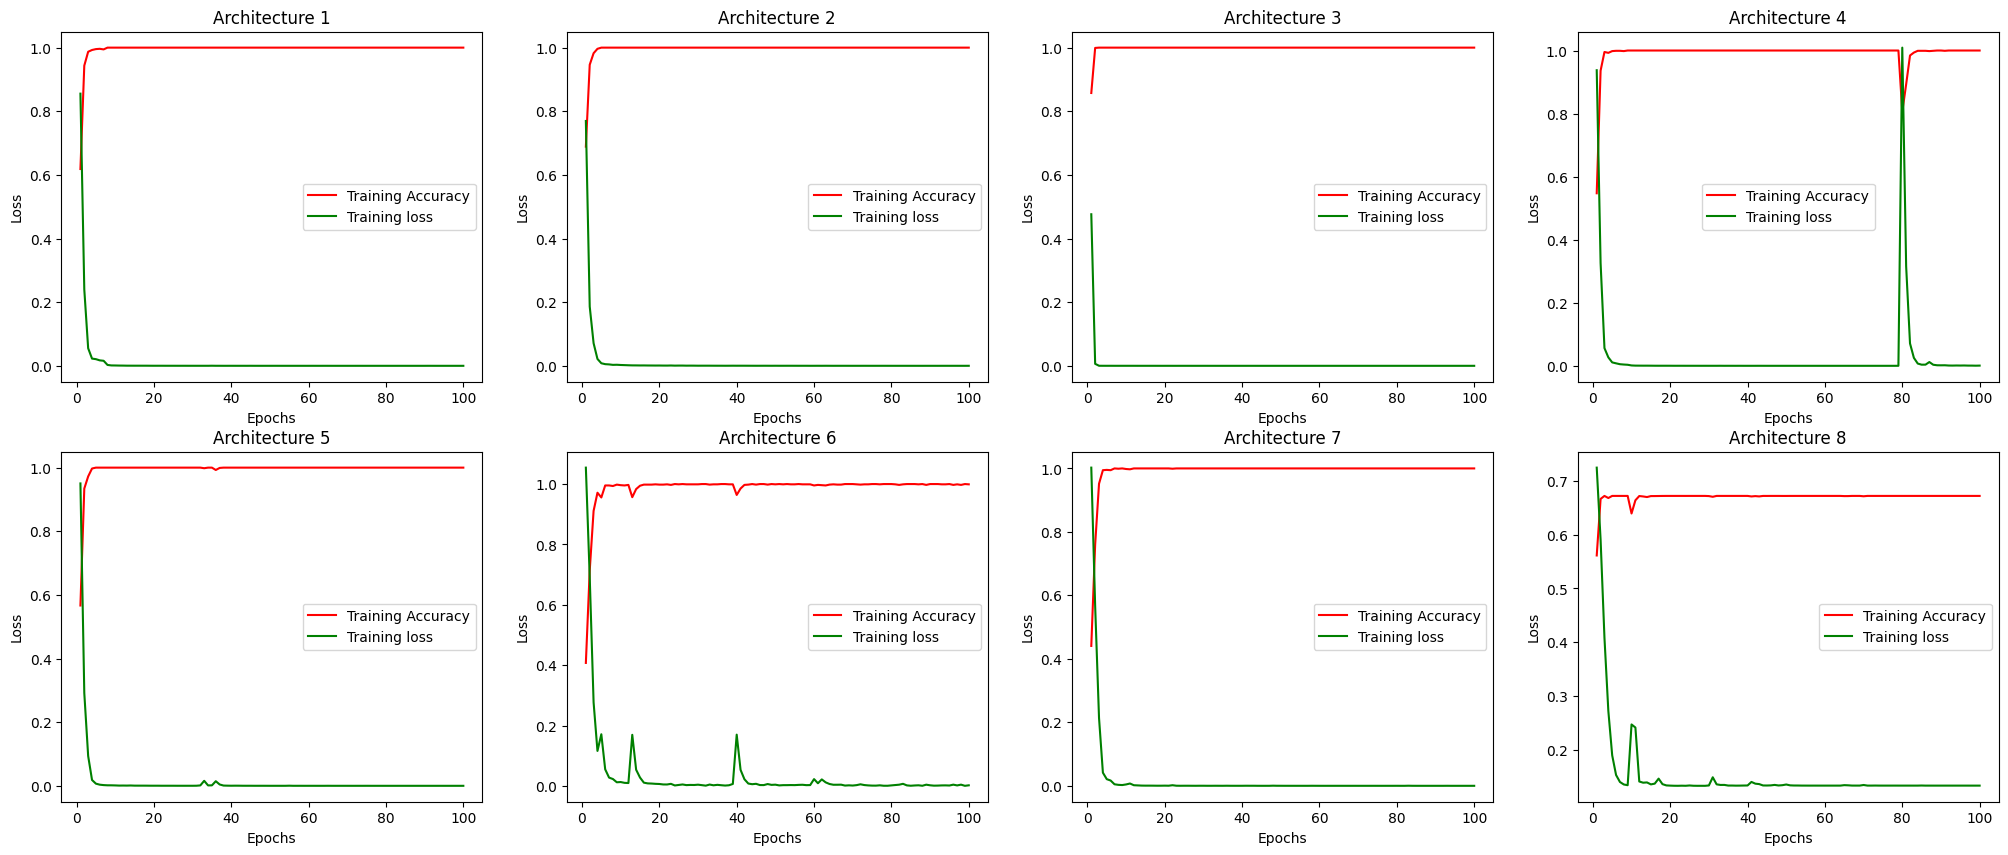

In [57]:
from IPython.display import display
display(fig)

## Plot of Best Architecture

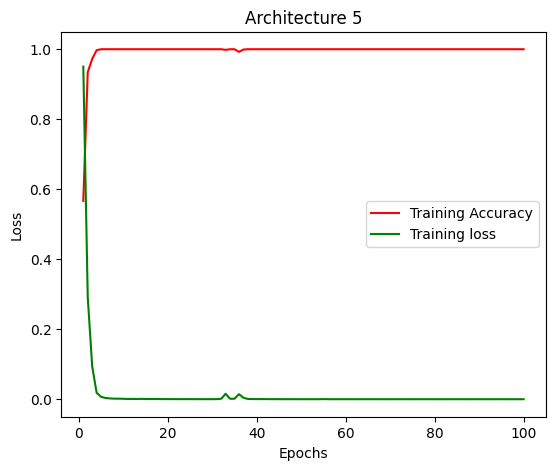

In [58]:
best = 5

if (best <= 4):
  best_x = 0
  best_y = best - 1
else:
  best_x = 1
  best_y = (best - 1) - 4

# Set the spacing between subplots to zero
fig.subplots_adjust(wspace=0, hspace=0)

# Hide the other subplots
for i in range(2):
    for j in range(4):
        if i != best_x or j != best_y:
            axes[i, j].set_visible(False)

display(axes[best_x, best_y].figure)